# Python data analysis libraries: pandas, sklearn and keras

### Dmitry Petrov

#### January 11

### Main goal of this tutorial is to share my experience of using particular python libraries for machine learning/data analysis and provide brief intro into them

### 0. Contents

#### Part 1. Overview
1. <a href = '#python'>Python pros and cons</a>
2. <a href = '#libs'>Relevant python libraries for data analysis</a>
3. <a href = '#jupyter'>Jupyter</a>
4. <a href = '#pandas'>Pandas</a>
5. <a href = '#sklearn'>Sklearn</a>
5. <a href = '#sklearn'>Keras</a>


### 0. Contents

#### Part 2. Practical tuorial
6. <a href='#jupyter bash'>Jupyter bash interface</a>
7. <a href='#eda'>Exploratory data analysis with pandas, seaborn and matplotlib</a>
8. <a href='#sklearn'>Machine learning with scikit-learn on MNIST</a>
9. <a href='#keras'>Deep learning with Keras on MNIST</a>


# Part 1. Overview

<a id='python'></a>
## 1.Python pros and cons

+ good for both prototyping and production <br>
+ lot of scientific, data analysis and big data libraries with a lot of synergy <br>
+ open source project with huge community (i.e. cheap + great knowledge base + a lot of tutorials + 
possibility to tweak algorithms for your own purposes) <br> 
+ objective oriented <br>
+ somewhat slow (but a lot of fast libraries in C++ do have python interfaces and also there is Cython if you care) <br>
+ python 2.X and 3.X conflict issues (more relevant for neuroscience, can be solved by virtual environments) <br> 
+ bad visualization tools (I disagree, but some people mention it) <br>

<a id='libs'></a>

## 2. Relevant python libraries for data analysis


 * scipy, numpy for fast scientific computing: linear algebra, statistics
 
 * **pandas** for data preprocessing and exploratory analysis

 * **jupyter** for interactive data analysis and prototyping
 
 * **matplotlib**, **seaborn** for visualization
 
 * **scikit-learn**, shogun, xgboost for machine learning 
 
 * **keras**, lasagne, mxnet, theano, tensorflow for deep learning
 
 * networkX (slow, okay interface), igraph (fast, bad interface), graph-tool, brain connectivity toolbox for graph analysis

<a id='jupyter'></a>

## 3. Jupyter

#### Interactive environment for prototyping and exploratory data analysis


+ ability to run code in different cells with same variables
+ customizable
+ can be run remotely
+ you can use different kernels (virtual environments)
+ results can be presented without running the code (similar to R markdown)
+ great for prototyping
+ 'magic' functions
+ compatible with R, Python, Julia
+ supports $\LaTeX$


<a id='pandas'></a>

## 4. Pandas


#### Python library for exploratory data analysis and data processing


+ powerful data structures (dataframe, panel)
+ fast built-in funtions for data processing and analysis
+ compatibility with lot of data formats
+ compatible with sklearn
+ can be slow if you don't use built-in functions
+ feels kinda clunky when you start to learn it

<a id='sklearn'></a>

## 5. Sklearn: main features


#### Swiss army knife for machine learning


+ great architecture, interface and documentation
+ wide variety of tools for predictive modelling, dimensionality reduction, validation and preprocessing
+ fully reproducible
+ parallelization in terms of multi-threading
+ implementations of some models are slow or memory inefficient
+ there is no parallelization for grid computing (not that I know of)

<a id='sklearn'></a>

## 5. Sklearn: structure 

+ **cluster.** Clustering methods (k-means, spectral clustering, DBSCAN)
+ **model_selection.** Validation tools
+ **decomposition.** Matrix decomposotion tools like SVD or PCA
+ **ensemble.** Ensemble methods like Random Forest, bagging classifiers or Adaboost
+ **feature_selection.** Feature selection tools like univariate test or recursive feature elimination
+ **linear_model.** Linear models and tools
+ **manifold.** Non-linear dimensionality reduction methods
+ **metrics.** Metrics for validationg and analysing models
+ **neighbors.** Nearest neighbors models and tools
+ **pipeline.** Tool for chaining data analysis steps
+ **svm.** Support Vector Machines methods
+ **preprocessing.** Data preprocessing tools



<a id='keras'></a>

## 6. Keras


#### Minimalistic and powerful tool for deep learning with support of different backends

+ high level of abstraction
+ great interface 
+ great documentation and examples
+ supporst both theano and tensorflow
+ for advanced stuff (i.e. your own layers) requires knowledge of theano or tensrflow
+ somewhat slow in reaction to backend sudden changes

# Part 2. Practical tutorial

<a id='jupyter bash'></a>

## 1. Jupyter bash interface

In [1]:
! pwd

/home/deaddy/Repos/IGC python tutorial


In [2]:
! ls

data  IGC_python.ipynb	IGC_python.slides.html	scripts


In [194]:
! ls -a data

.  ..  HCP_metadata.csv  houses_test.csv  houses_train.csv  mldata


In [195]:
! ls -a scripts

.  ..  hello.py  hello.sh


In [5]:
! cat scripts/hello.sh

#!/bin/bash

echo 'This is shell script running'
echo
echo 'Shell python version'
python -c 'import sys; print(sys.version)'
echo 'Running python script'
echo
echo '--------------------'
echo
source activate neuropy
python scripts/hello.py
source deactivate neuropy
echo
echo '--------------------'
echo
echo 'This is shell script again. Bye!'


In [6]:
! cat scripts/hello.py

from __future__ import print_function
import sys
import os

print('\tThis is python script running. \n')

print('\tPython version: ', sys.version)
print('\tThis is python script finishing work. Bye')


In [7]:
! bash scripts/hello.sh

This is shell script running

Shell python version
3.5.1 |Anaconda custom (64-bit)| (default, Dec  7 2015, 11:16:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Running python script

--------------------

	This is python script running. 

	Python version:  2.7.12 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
	This is python script finishing work. Bye

--------------------

This is shell script again. Bye!


In [8]:
import sys

print(sys.version)

3.5.1 |Anaconda custom (64-bit)| (default, Dec  7 2015, 11:16:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


<a id='pandas'></a>

## 2. Exploratory data analysis with pandas, jupyter, matplotlib and seaborn





In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
%matplotlib inline

### Example 1: houses data from Kaggle

In [205]:
houses = pd.read_csv('data/houses_train.csv', index_col = 0)
houses.shape

(1460, 80)

In [206]:
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [207]:
houses.isnull().any()[:10]

MSSubClass     False
MSZoning       False
LotFrontage     True
LotArea        False
Street         False
Alley           True
LotShape       False
LandContour    False
Utilities      False
LotConfig      False
dtype: bool

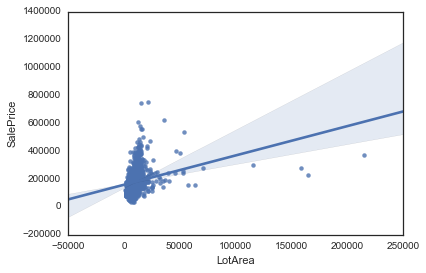

In [208]:
sns.regplot(houses.LotArea, houses.SalePrice)

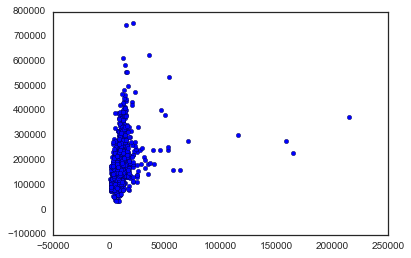

In [209]:
plt.scatter(houses.LotArea, houses.SalePrice)

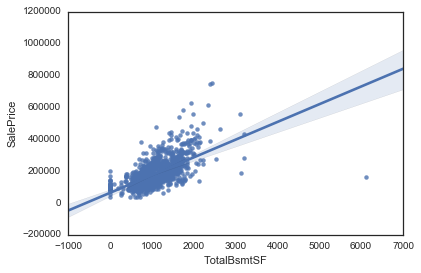

In [210]:
sns.regplot(houses.TotalBsmtSF, houses.SalePrice)

/home/deaddy/.local/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


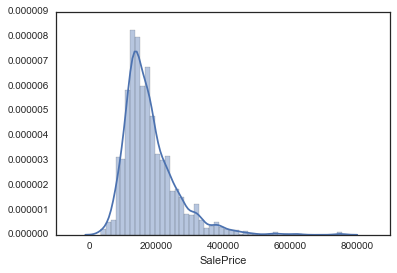

In [211]:
sns.distplot(houses.SalePrice.astype(int))

### Example 2: HCP metadata

In [212]:
hcp = pd.read_csv('data/HCP_metadata.csv', index_col=0)
hcp.shape

(527, 197)

In [213]:
hcp.columns.values[:10]

array(['Age_in_Yrs', 'Twin_Stat', 'Zygosity', 'Mother_ID', 'Father_ID',
       'Race', 'Ethnicity', 'Handedness', 'SSAGA_Employ', 'SSAGA_Income'], dtype=object)

In [214]:
features = hcp.columns.values[:5]
print(features)

['Age_in_Yrs' 'Twin_Stat' 'Zygosity' 'Mother_ID' 'Father_ID']


In [215]:
hcp[features].head()

,Age_in_Yrs,Twin_Stat,Zygosity,Mother_ID,Father_ID
Subject,,,,,
100307,27,Twin,NotMZ,51488,81352.0
100408,33,Twin,MZ,51730,81594.0
101006,35,Twin,MZ,51283,81149.0
101107,22,NotTwin,NotTwin,51969,81833.0
101309,29,NotTwin,NotTwin,52385,82248.0


In [216]:
hcp.iloc[:5,:5]

,Age_in_Yrs,Twin_Stat,Zygosity,Mother_ID,Father_ID
Subject,,,,,
100307,27,Twin,NotMZ,51488,81352.0
100408,33,Twin,MZ,51730,81594.0
101006,35,Twin,MZ,51283,81149.0
101107,22,NotTwin,NotTwin,51969,81833.0
101309,29,NotTwin,NotTwin,52385,82248.0


In [217]:
hcp.groupby(by = 'Zygosity').size()

Zygosity
MZ         118
NotMZ      137
NotTwin    272
dtype: int64

In [218]:
hcp.groupby(by = 'Zygosity').mean()['Age_in_Yrs']

Zygosity
MZ         30.067797
NotMZ      29.868613
NotTwin    28.492647
Name: Age_in_Yrs, dtype: float64

In [219]:
hcp.groupby(by = 'Zygosity').std()['Age_in_Yrs']

Zygosity
MZ         3.109755
NotMZ      2.809693
NotTwin    3.797448
Name: Age_in_Yrs, dtype: float64

(array([ 36.,  21.,  67.,  49.,  55.,  95.,  45.,  94.,  33.,  32.]),
 array([ 22. ,  23.4,  24.8,  26.2,  27.6,  29. ,  30.4,  31.8,  33.2,
         34.6,  36. ]),
 <a list of 10 Patch objects>)

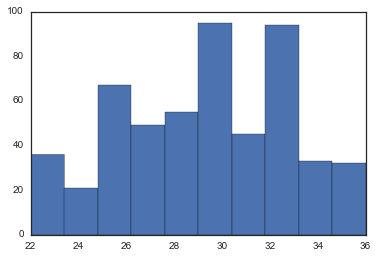

In [220]:
plt.hist(hcp.Age_in_Yrs, bins = 10)

/home/deaddy/.local/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


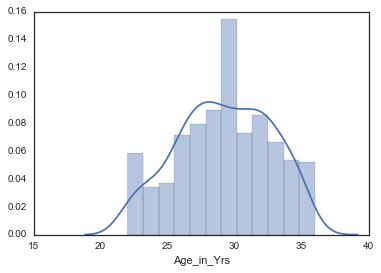

In [221]:
sns.distplot(hcp.Age_in_Yrs)

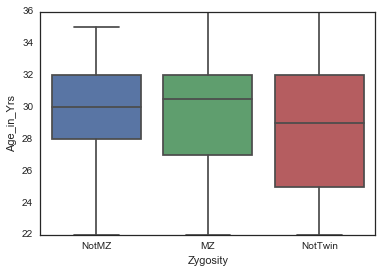

In [222]:
sns.boxplot(x = 'Zygosity', y = 'Age_in_Yrs', data = hcp)

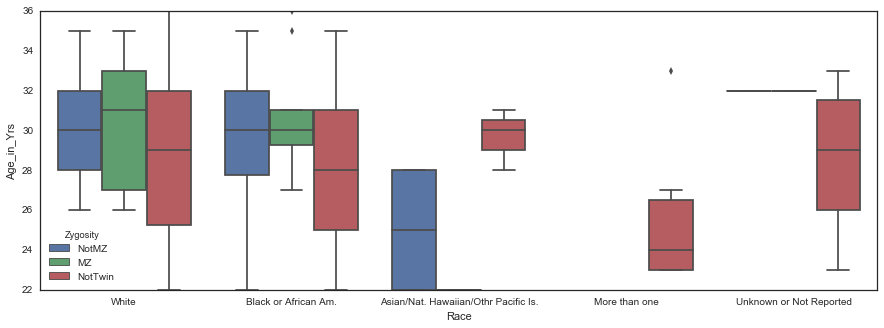

In [223]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Race', y = 'Age_in_Yrs', hue = 'Zygosity', data = hcp)

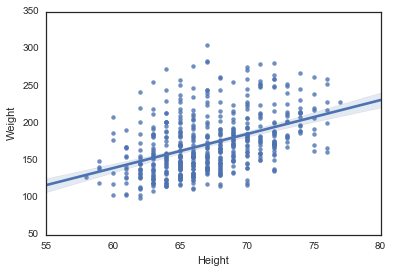

In [224]:
sns.regplot(hcp.Height, hcp.Weight)

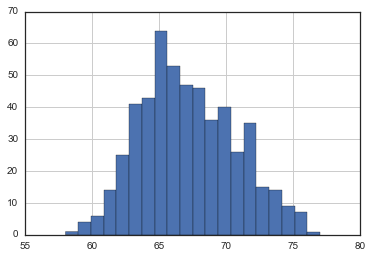

In [225]:
hcp.Height.hist(bins = 20)

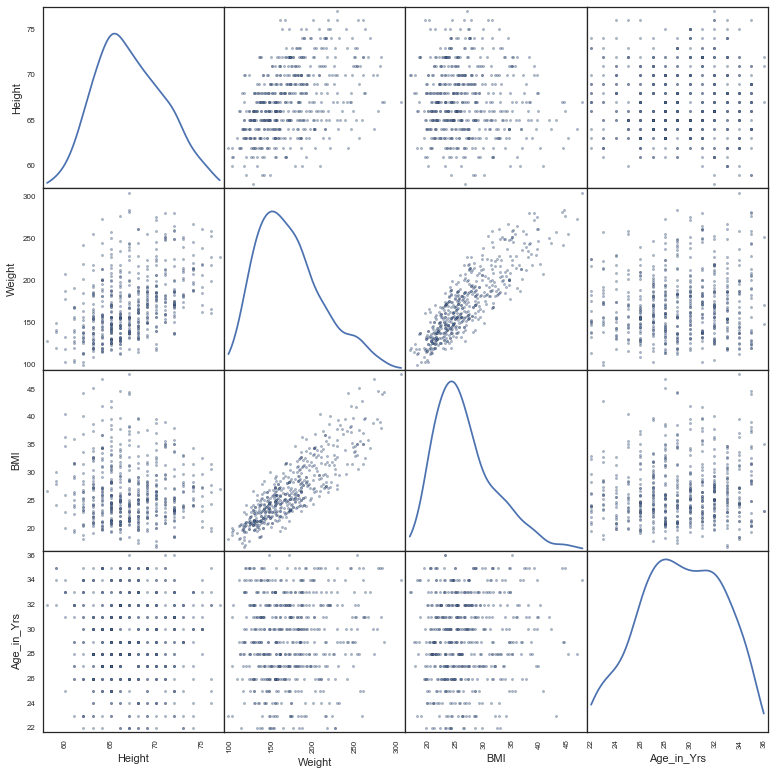

In [226]:
from pandas.tools.plotting import scatter_matrix

features = ['Height', 'Weight', 'BMI', 'Age_in_Yrs']

scatter_matrix(hcp[features], figsize = (13,13), diagonal = 'kde')
pass

### Example 3: MNIST

In [227]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='data')

In [228]:
mnist_data = mnist.data
mnist_target = mnist.target

Target variable for index -100 is 9.0


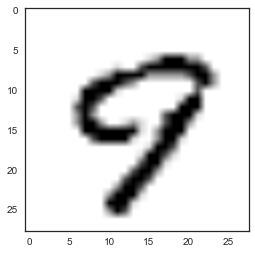

In [229]:
sns.set_style('white')
ind = -100
print('Target variable for index {} is {}'.format(ind, mnist_target[ind]))
plt.imshow(mnist_data[ind,:].reshape((28,28)))

In [230]:
mnist_df = pd.DataFrame(mnist_data)

In [231]:
mnist_df['target'] = mnist_target.astype(int)

In [232]:
mnist_df.target.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: target, dtype: int64

In [233]:
sel2 = mnist_df[mnist_df.target == 2]
sel2.target.value_counts()

2    6990
Name: target, dtype: int64

In [234]:
sel2 = mnist_df.query('target == 2')
sel2.target.value_counts()

2    6990
Name: target, dtype: int64

## 3. Scikit-learn machine learning examples on MNIST data

In [235]:
features = mnist_df.columns[:-1]

In [236]:
features

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       774, 775, 776, 777, 778, 779, 780, 781, 782, 783],
      dtype='object', length=784)

In [237]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np



#### Splitting data into train/test

In [238]:
X_train, X_test, y_train, y_test = train_test_split(mnist_df[features], 
                                                    mnist_df.target, test_size = 0.5, 
                                                    random_state = 0, stratify = mnist_df.target)

In [239]:
mnist_df.target.value_counts()/len(mnist_df.target)

1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
Name: target, dtype: float64

In [240]:
y_train.value_counts()/len(y_train)

1    0.112543
7    0.104171
3    0.102029
2    0.099857
9    0.099400
0    0.098600
6    0.098229
8    0.097514
4    0.097486
5    0.090171
Name: target, dtype: float64

In [241]:
y_test.value_counts()/len(y_test)

1    0.112514
7    0.104200
3    0.102000
2    0.099857
9    0.099400
0    0.098629
6    0.098229
8    0.097486
4    0.097486
5    0.090200
Name: target, dtype: float64

In [242]:
clf_lr = SGDClassifier(loss='hinge', penalty = 'elasticnet', random_state=1)
clf_lr.fit(X_train, y_train)
preds = clf_lr.predict(X_test)
print('Accuracy on test:', accuracy_score(y_test, preds))

Accuracy on test: 0.877542857143


In [243]:
clf.coef_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [244]:
clf.intercept_

array([-1305.83504172, -1439.65026228, -1126.54258055, -1193.45796201,
       -1322.25654667, -1025.71221284, -1243.21465877, -1183.12855568,
        -991.0748355 , -1220.8244281 ])

In [245]:
scaler = StandardScaler()
pipe = Pipeline([('scaler', scaler), ('clf', clf)])
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
print('Accuracy on test:', accuracy_score(y_test, preds))

Accuracy on test: 0.913028571429


In [92]:
scaler = StandardScaler()
scaler.mean_

AttributeError: 'StandardScaler' object has no attribute 'mean_'

In [93]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [246]:
scaler.mean_[15]

0.00025714285714285715

In [247]:
X_train.mean()[15]

0.00025714285714285715

In [95]:
pipe.named_steps['scaler'].scale_[15]

0.048106336296172912

In [96]:
X_train.std(ddof=0)[15]

0.048106336296172912

In [78]:
pipe.named_steps['clf']

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=1, shuffle=True,
       verbose=0, warm_start=False)

In [248]:
pipe.named_steps['clf'].coef_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [261]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clf_rf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs = 8, max_depth=30)
clf_rf.fit(X_train, y_train)
preds = clf_rf.predict(X_test)
print('Accuracy on test:', accuracy_score(y_test, preds))

Accuracy on test: 0.938085714286


In [262]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(clf_lr, mnist_df[features], y=mnist_df.target, 
                         scoring = 'accuracy', verbose = 0, n_jobs = 8)
print('CV score is {:.3f} ± {:.3f}'.format(scores.mean(), scores.std()))

CV score is 0.859 ± 0.005


In [263]:
scores = cross_val_score(pipe, mnist_df[features], y=mnist_df.target, 
                         scoring = 'accuracy', verbose = 0, n_jobs = 8)
print('CV score is {:.3f} ± {:.3f}'.format(scores.mean(), scores.std()))

CV score is 0.910 ± 0.003


In [264]:
scores = cross_val_score(clf_rf, mnist_df[features], y=mnist_df.target, 
                         scoring = 'accuracy', verbose = 0, n_jobs = 8)
print('CV score is {:.3f} ± {:.3f}'.format(scores.mean(), scores.std()))

CV score is 0.943 ± 0.003


In [267]:
from sklearn.grid_search import GridSearchCV

rf_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5]}

grid_cv = KFold(n_splits=2, shuffle=True, random_state=0)
clf_grid = GridSearchCV(clf_rf, param_grid= rf_grid, cv = list(grid_cv.split(X_train)))
clf_grid.fit(X_train, y_train)
pass

In [265]:
clf_grid.best_params_

{'max_depth': None, 'n_estimators': 100}

In [266]:
preds = clf_grid.predict(X_test)
print('Accuracy on test:', accuracy_score(y_test, preds))

Accuracy on test: 0.965028571429


In [269]:
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [271]:
pipe_grid = {'scaler__with_mean': [True, False],
           'clf__alpha': [0.001, 0.01],
           'clf__l1_ratio': [0, 0.5, 1]}

grid_cv = KFold(n_splits=2, shuffle=True, random_state=0)
clf_grid = GridSearchCV(pipe, param_grid= pipe_grid, cv = list(grid_cv.split(X_train)))
clf_grid.fit(X_train, y_train)
pass

In [272]:
clf_grid.best_score_

0.901

In [273]:
clf_grid.best_params_

{'clf__alpha': 0.001, 'clf__l1_ratio': 0.5, 'scaler__with_mean': True}

In [274]:
preds = clf_grid.predict(X_test)
print('Accuracy on test:', accuracy_score(y_test, preds))

Accuracy on test: 0.906714285714


## 4. Deep learning with Keras

In [160]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras import backend as K


In [158]:
X_train, X_test, y_train, y_test = train_test_split(mnist_df[features], 
                                                    mnist_df.target, test_size = 0.5, 
                                                    random_state = 0, stratify = mnist_df.target)

batch_size = 128
nb_classes = 10
nb_epoch = 20

X_train = X_train.values.astype('float32')
X_test = X_test.values.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train.values, nb_classes)
Y_test = np_utils.to_categorical(y_test.values, nb_classes)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

35000 train samples
35000 test samples
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_4 (Dense)                  (None, 512)           401920      dense_input_2[0][0]              
____________________________________________________________________________________________________
activation_4 (Activation)        (None, 512)           0           dense_4[0][0]                    
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 512)           0           activation_4[0][0]               
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 512)           262656      dropout_3[0][0]                  
____________________________________________________

In [188]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

X_train shape: (35000, 1, 28, 28)
35000 train samples
35000 test samples
Train on 35000 samples, validate on 35000 samples
Epoch 1/12
35000/35000 [==============================] - 23s - loss: 0.4594 - acc: 0.8541 - val_loss: 0.1127 - val_acc: 0.9669
Epoch 2/12
35000/35000 [==============================] - 23s - loss: 0.1474 - acc: 0.9564 - val_loss: 0.0737 - val_acc: 0.9779
Epoch 3/12
35000/35000 [==============================] - 23s - loss: 0.1122 - acc: 0.9660 - val_loss: 0.0595 - val_acc: 0.9821
Epoch 4/12
35000/35000 [==============================] - 23s - loss: 0.0953 - acc: 0.9705 - val_loss: 0.0562 - val_acc: 0.9834
Epoch 5/12
35000/35000 [==============================] - 23s - loss: 0.0822 - acc: 0.9743 - val_loss: 0.0484 - val_acc: 0.9859
Epoch 6/12
35000/35000 [==============================] - 23s - loss: 0.0745 - acc: 0.9773 - val_loss: 0.0489 - val_acc: 0.9860
Epoch 7/12
35000/35000 [==============================] - 23s - loss: 0.0666 - acc: 0.9794 - val_loss: 0.0445

In [179]:
model.layers

In [187]:
model.layers[0].get_weights()[0][2,:,:]

array([[[-0.08900257, -0.24661139, -0.15455596],
        [ 0.16776082,  0.11650044,  0.12082494],
        [ 0.06009205,  0.09314613,  0.19738637]]], dtype=float32)

In [190]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = 'https://i.warosu.org/data/sci/img/0073/62/1435656449422.png ')